In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [11]:
books = pd.read_csv('../data/raw/books.csv')
books.head()

,title,category,price,availability,rating,description,img
0,A Light in the Attic,Poetry,Â£51.77,True,3,It's hard to imagine a world without A Light i...,https://books.toscrape.com/media/cache/fe/72/f...
1,Tipping the Velvet,Historical Fiction,Â£53.74,True,1,"""Erotic and absorbing...Written with starling ...",https://books.toscrape.com/media/cache/08/e9/0...
2,Soumission,Fiction,Â£50.10,True,1,"Dans une France assez proche de la nÃ´tre, un ...",https://books.toscrape.com/media/cache/ee/cf/e...
3,Sharp Objects,Mystery,Â£47.82,True,4,"WICKED above her hipbone, GIRL across her hear...",https://books.toscrape.com/media/cache/c0/59/c...
4,Sapiens: A Brief History of Humankind,History,Â£54.23,True,5,From a renowned historian comes a groundbreaki...,https://books.toscrape.com/media/cache/ce/5f/c...


In [12]:
# lets find how many rows are there
books.shape

(1000, 7)

In [13]:
# missing  values 
books.isnull().sum()

title           0
category        0
price           0
availability    0
rating          0
description     0
img             0
dtype: int64

In [14]:
# duplicates 
books.duplicated().sum()

np.int64(0)

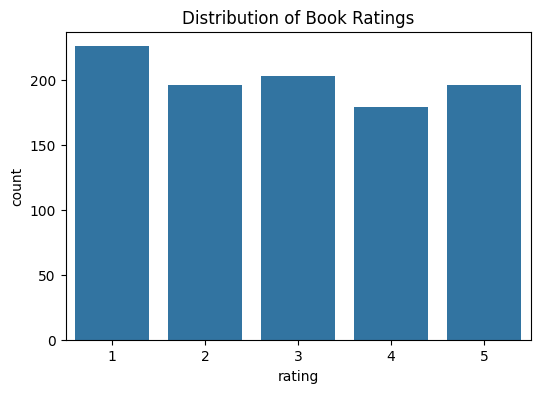

In [18]:

# 3. Distribution of ratings
plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=books)
plt.title("Distribution of Book Ratings")
plt.show()



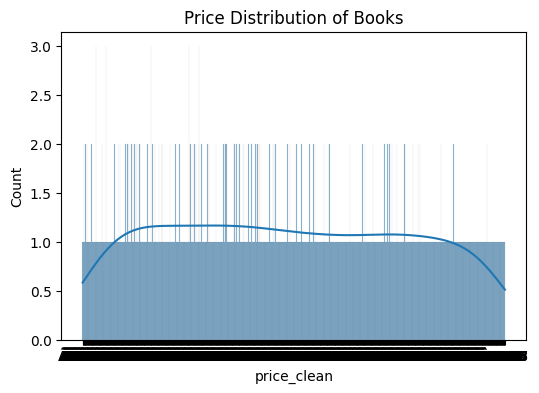

In [20]:
# 4. Price distribution
# remove £ and convert to float
books["price_clean"] = books["price"].str.replace("£","")

plt.figure(figsize=(6,4))
sns.histplot(books["price_clean"], bins=20, kde=True)
plt.title("Price Distribution of Books")
plt.show()

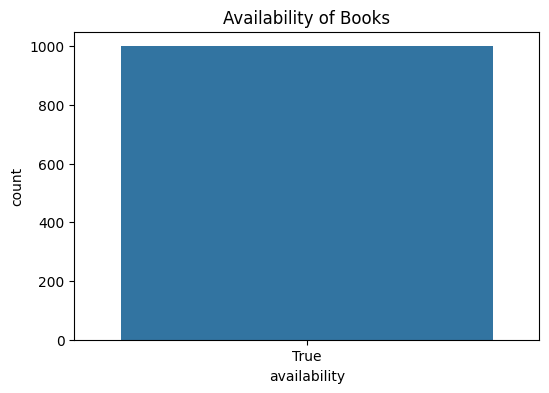

In [21]:
# 5. Availability breakdown
plt.figure(figsize=(6,4))
sns.countplot(x="availability", data=books)
plt.title("Availability of Books")
plt.show()

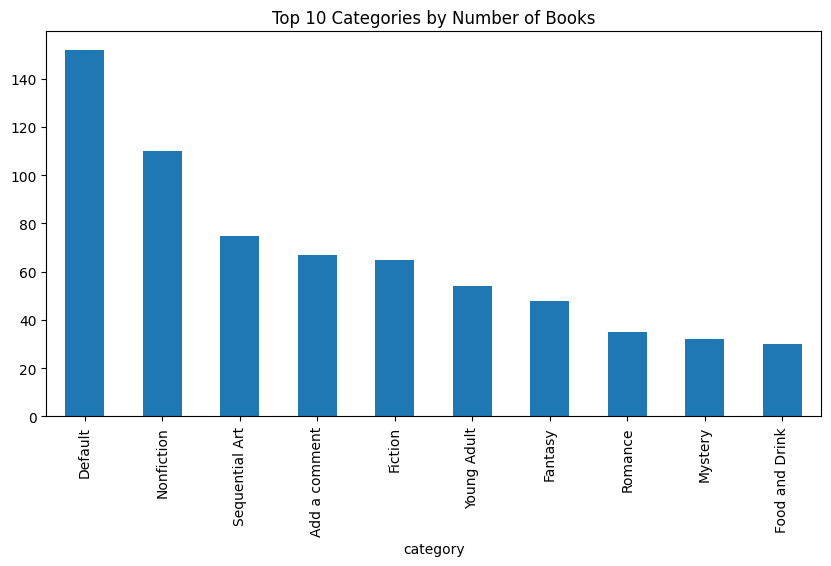

In [22]:
# 6. Top 10 categories
plt.figure(figsize=(10,5))
books["category"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Categories by Number of Books")
plt.show()

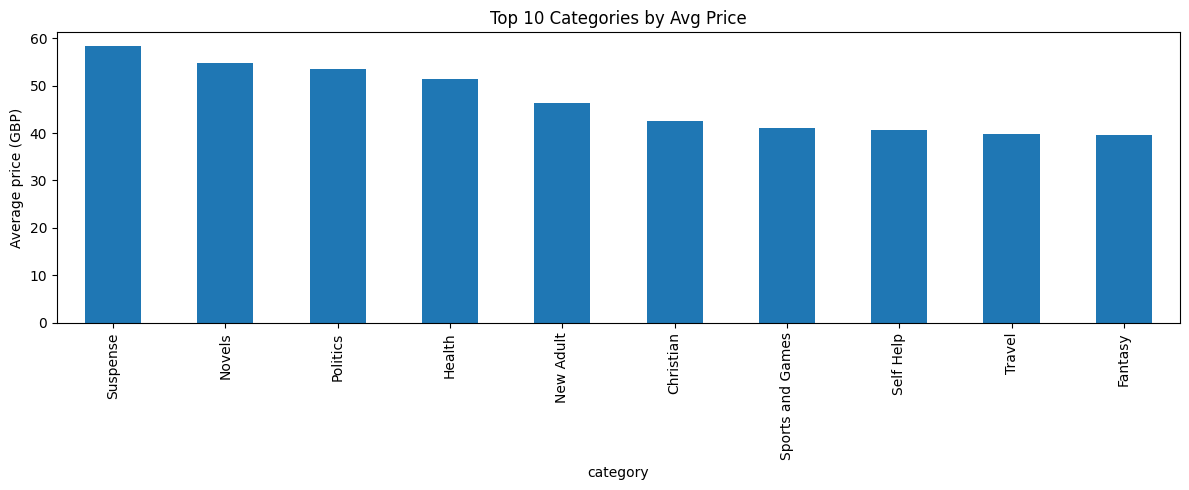

In [30]:
# 1) Make sure price_clean is numeric (robust to £, Â£, spaces, etc.)
books["price_clean"] = (
    books["price"]
    .astype(str)
    .str.replace(r"[^\d\.]", "", regex=True)   # keep only digits and dot
    .str.strip()
    .replace("", pd.NA)
    .pipe(pd.to_numeric, errors="coerce")
)

# 2) Clean category text
books["category"] = books["category"].astype(str).str.strip()

# 3) Compute avg price by category and plot
avg_price = (
    books.dropna(subset=["category", "price_clean"])
         .groupby("category")["price_clean"]
         .mean()
         .sort_values(ascending=False)
         .head(10)
)

plt.figure(figsize=(12, 5))
avg_price.plot(kind="bar")
plt.ylabel("Average price (GBP)")
plt.title("Top 10 Categories by Avg Price")
plt.tight_layout()
plt.show()

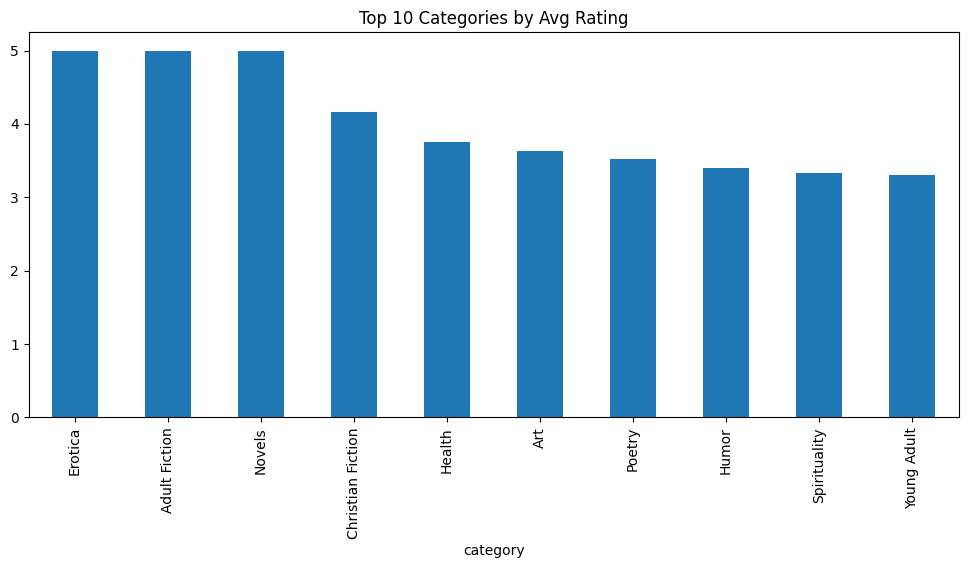

In [31]:
# 8. Avg rating per category
plt.figure(figsize=(12,5))
books.groupby("category")["rating"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Categories by Avg Rating")
plt.show()


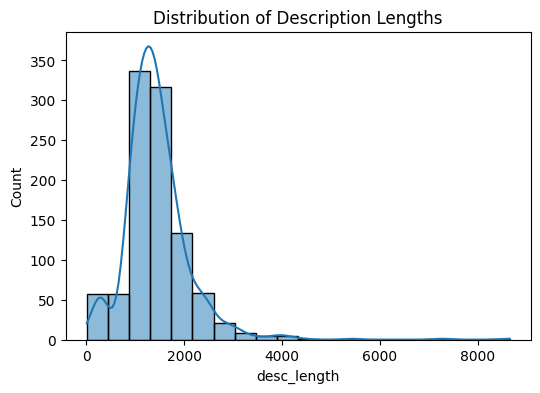

In [32]:

# 9. Description length
books["desc_length"] = books["description"].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.histplot(books["desc_length"], bins=20, kde=True)
plt.title("Distribution of Description Lengths")
plt.show()

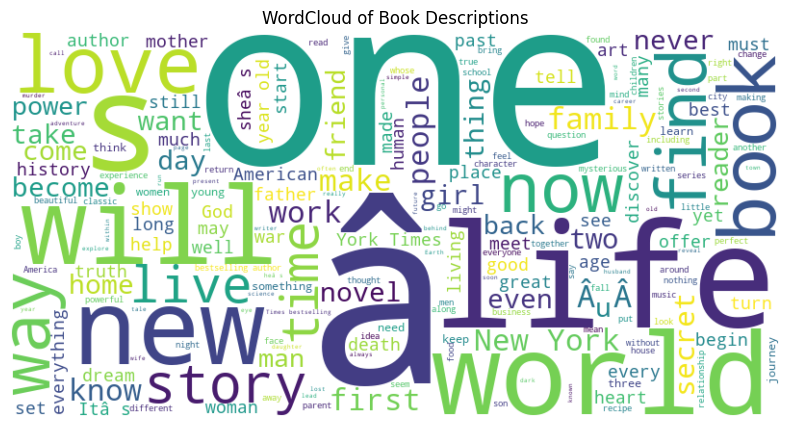

In [33]:
# 10. WordCloud of descriptions
text = " ".join(books["description"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Book Descriptions")
plt.show()